### 10/05/2023
# Clase de mapas con Martín Nadal

Primero instalamos folium, una librería que nos permite crear mapas.

In [5]:
#!pip install folium

In [9]:
# vamos a importar el paquete lo primero
import folium

In [17]:
# y creamos un mapa con unas determinadas coordenadas
m = folium.Map(location=(40,-3))

# con un marcador

marker = folium.Marker((40,-3),popup="Marcador",tooltip="Esto es un tooltip")

#añadimos el marcador al mapa

m.add_child(marker)

# y mostramos el mapa, que podemos exportar rápidamente a html si queremos

m

In [16]:
# podemos incluso guardarlo para mostrarlo ya en nuestra web con html

m.save("mapa.html")

In [25]:
# repasando pandas y python, vamos a importar pandas
import pandas as pd

# un ejemplo de comandos es loc
# lleva dos parámetros, uno la fila y otro la columna del dato que buscamos
# df.loc[2,'nombrecolumna1']      # no la va a ejecutar porque no hay df

# también tenemos el comando iloc
# este nos permite usar números para buscar la fila que queremos, no requiere del nombre como loc
# df.iloc[2]

# es útil también el comando list
# nos permite ver en una lista el índice de las filas o de las columnas, por ejemplo
# list(df.index)

# podemos renombrar los índices también
# indice = ['f1', 'f2', 'f3', 'f4']
# df.index = indice

# values nos permite convertir valores de pandas a numpy para que podamos usarlos
# df['fila2'].values

# también vamos a usar matplotlib
import matplotlib.pyplot as plt

Vamos a hacer prácticas con una [API con las cifras de covid](https://api.covid19api.com/countries).

In [26]:
# vamos a añadir la url a nuestro cuaderno como una variable
url = 'https://api.covid19api.com/countries'

Está en un tipo de datos que se llama **json**, que viene de javascript object notation. .json es una manera en la que intercambiar los datos de forma que cualquier navegador lo puede entender mediante su navegador automático.

In [27]:
# ahora podemos leer los datos en json
df = pd.read_json(url)

In [29]:
# y podemos ir accediendo a ellos
df['Country'][245]

'Netherlands'

In [32]:
# si quisiéramos saber dónde está España, por ejemplo, hacemos un filtro
df['Country'] == 'Spain'

0      False
1      False
2      False
3      False
4      False
       ...  
243    False
244    False
245    False
246    False
247    False
Name: Country, Length: 248, dtype: bool

In [33]:
# y aplicamos ese filtro sobre el df
df[df['Country'] == 'Spain']

,Country,Slug,ISO2
179,Spain,spain,ES


In [36]:
# en la página web podemos ver más datos sobre las columnas
# primero, vamos a echar un vistazo al dataframe
df

,Country,Slug,ISO2
0,Maldives,maldives,MV
1,Puerto Rico,puerto-rico,PR
2,Uganda,uganda,UG
3,Viet Nam,vietnam,VN
4,Malaysia,malaysia,MY
...,...,...,...
243,Austria,austria,AT
244,Haiti,haiti,HT
245,Netherlands,netherlands,NL
246,New Caledonia,new-caledonia,NC


In [39]:
# sin embargo, este dataframe solo nos incluye los nombres de los países
# así que a partir de aquí podemos buscar los datos de un país concreto
# por ejemplo, en el caso de San Marino, tendríamos que buscar por el slug concreto
url = 'https://api.covid19api.com/country/san-marino/status/confirmed/live'

Vamos a trabajar ahora por ejemplo con los datos de **Alemania** y de **Sudáfrica**.

In [66]:
# alemania
url = 'https://api.covid19api.com/country/germany/status/confirmed/live'
de = pd.read_json(url)

# sudáfrica
url = 'https://api.covid19api.com/country/south-africa/status/confirmed/live'
sa = pd.read_json(url)

In [67]:
# vamos a crear un dataframe solo con los datos de casos ('Cases') de ambos países
# los sacamos por un índice de fecha para luego poder concatenarlos
casos_de = de.set_index('Date')['Cases']
casos_sa = sa.set_index('Date')['Cases']

In [54]:
# y ahora concatenamos los datos de Alemania y de Sudáfrica con la función concat
# la función concat necesita los parámetros de los dataframe que queremos concatenar y de cómo queremos concatenarlos
# si ponemos axis=1 significa que nos los ponga en dos columnas distintas, no que nos los ponga en la misma de seguido
# lo hacemos en un nuevo dataframe que se llama agregados
agregados = pd.concat([casos_de,casos_sa],axis=1)
agregados

,Cases,Cases
Date,,
2020-01-22 00:00:00+00:00,0,0
2020-01-23 00:00:00+00:00,0,0
2020-01-24 00:00:00+00:00,0,0
2020-01-25 00:00:00+00:00,0,0
2020-01-26 00:00:00+00:00,0,0
...,...,...
2023-03-05 00:00:00+00:00,38210851,4064889
2023-03-06 00:00:00+00:00,38210851,4065857
2023-03-07 00:00:00+00:00,38231610,4066044


In [60]:
# cambiamos el índice para que nos salga a qué valores corresponde cada línea en la tabla
agregados.columns = ['Alemania','Sudáfrica']
agregados

,Alemania,Sudáfrica
Date,,
2020-01-22 00:00:00+00:00,0,0
2020-01-23 00:00:00+00:00,0,0
2020-01-24 00:00:00+00:00,0,0
2020-01-25 00:00:00+00:00,0,0
2020-01-26 00:00:00+00:00,0,0
...,...,...
2023-03-05 00:00:00+00:00,38210851,4064889
2023-03-06 00:00:00+00:00,38210851,4065857
2023-03-07 00:00:00+00:00,38231610,4066044


<Axes: xlabel='Date'>

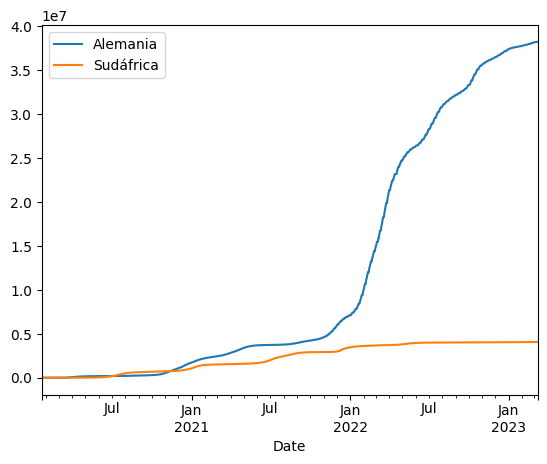

In [61]:
# visualizamos
agregados.plot()

Ahora por ejemplo vamos a agregar los datos de **España**.

In [64]:
# españa
url = 'https://api.covid19api.com/country/spain/status/confirmed/live'
es = pd.read_json(url)

In [68]:
casos_es = es.set_index('Date')['Cases']

In [69]:
agregados = pd.concat([casos_de,casos_sa,casos_es],axis=1)
agregados

,Cases,Cases,Cases
Date,,,
2020-01-22 00:00:00+00:00,0,0,0
2020-01-23 00:00:00+00:00,0,0,0
2020-01-24 00:00:00+00:00,0,0,0
2020-01-25 00:00:00+00:00,0,0,0
2020-01-26 00:00:00+00:00,0,0,0
...,...,...,...
2023-03-05 00:00:00+00:00,38210851,4064889,13770429
2023-03-06 00:00:00+00:00,38210851,4065857,13770429
2023-03-07 00:00:00+00:00,38231610,4066044,13770429


In [70]:
agregados.columns = ['Alemania','Sudáfrica','España']
agregados

,Alemania,Sudáfrica,España
Date,,,
2020-01-22 00:00:00+00:00,0,0,0
2020-01-23 00:00:00+00:00,0,0,0
2020-01-24 00:00:00+00:00,0,0,0
2020-01-25 00:00:00+00:00,0,0,0
2020-01-26 00:00:00+00:00,0,0,0
...,...,...,...
2023-03-05 00:00:00+00:00,38210851,4064889,13770429
2023-03-06 00:00:00+00:00,38210851,4065857,13770429
2023-03-07 00:00:00+00:00,38231610,4066044,13770429


<Axes: xlabel='Date'>

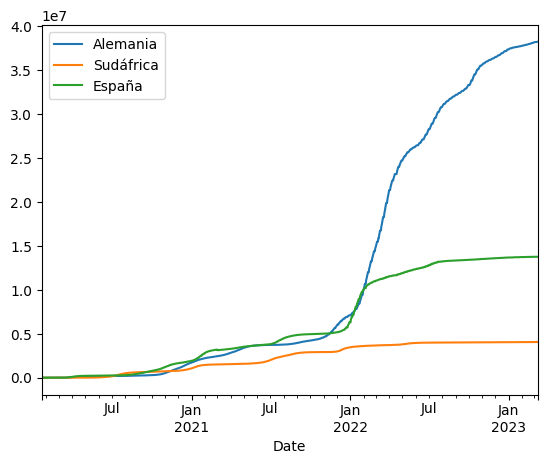

In [71]:
# visualizamos
agregados.plot()

Y cuando terminamos de trabajar con los datos **los guardamos en un csv**.

In [72]:
agregados.to_csv('agregados_DE_SA_ES.csv')